<a href="https://colab.research.google.com/github/WHarshal/Bank_Churn_Analysis/blob/main/Speech_Emotion_Recognition_for_Human_Computer_Interaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Speech Emotion Recognition for Human-Computer Interaction**

**Background:**

Speech emotion recognition is a vital component of human-computer interaction systems, enabling machines to understand and respond appropriately to human emotions conveyed through speech. This technology finds applications in areas such as virtual assistants, customer service, and mental health support.

**Objective:**

The objective of this project is to develop a robust Speech Emotion Recognition (SER) system capable of accurately identifying emotions expressed in spoken language. The system should be able to distinguish between a range of emotions, including but not limited to happiness, sadness, anger, fear, disgust, and neutrality.

---
*   **Import Dependencies**

In [ ]:
import numpy as np                          # NumPy is used for numerical computations.
import pandas as pd                         # Pandas is used for data manipulation and analysis, providing data structures like DataFrames.
import matplotlib.pyplot as plt             # Matplotlib is a plotting library that allows you to create various types of visualizations.
import seaborn as sns                       # Seaborn is a statistical data visualization library that provides an interface for creating informative and attractive statistical graphics.
import os                                   # This imports the os module, which provides a way to interact with the operating system.
import librosa                              # Librosa is used for audio analysis and manipulation, providing tools for tasks like loading audio files, extracting features, and more.
import librosa.display
from IPython.display import Audio           # This class is used for displaying audio widgets in a Jupyter notebook. The alias ipd is used for IPython.display.
import IPython.display as ipd
from scipy.io import wavfile as wav         # It is used for reading and writing WAV files.
from scipy.signal import resample           # It is used for resampling a signal to a new sample rate.
import warnings
warnings.filterwarnings('ignore')

*  **Load Data using os.walk**

In [ ]:
base_path='/content/drive/MyDrive/Speech Emotions Training Data'  # This line representing the path to the directory where the speech emotion training data is stored.

paths = []
labels = []

for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        split_filename = filename.split('_')
        label = split_filename[-2]
        labels.append(label.lower())

print("The dataset has been loaded successfully")

The dataset has been loaded successfully


In [ ]:
paths[:5]

['/content/drive/MyDrive/Speech Emotions Training Data/Crema/1079_WSI_HAP_XX.wav',
 '/content/drive/MyDrive/Speech Emotions Training Data/Crema/1079_WSI_ANG_XX.wav',
 '/content/drive/MyDrive/Speech Emotions Training Data/Crema/1079_TAI_ANG_XX.wav',
 '/content/drive/MyDrive/Speech Emotions Training Data/Crema/1079_WSI_DIS_XX.wav',
 '/content/drive/MyDrive/Speech Emotions Training Data/Crema/1079_TAI_HAP_XX.wav']

*    **Check unique values in the dataset.**

In [ ]:
unique_values = set(labels)
print(unique_values)

{'neu', 'fea', 'dis', 'ang', 'sad', 'hap'}


 **Interpretation: There are a total of 6 categories - Happy, Neutral Disgust, Angry, Sad, and Fear.**

*   **Mapping Emotion with there espective full forms**

In [ ]:
emotions_mapping = {
    'ang' : 'Angry',
    'dis' : 'Disgust',
    'fea' : 'Fear',
    'hap' : 'Happy',
    'neu' : 'Neutral',
    'sad' : 'Sad'
}

for i, emotions in enumerate(labels):
    if emotions in emotions_mapping:
        labels[i] = emotions_mapping[emotions]

print(labels[:5])

['Happy', 'Angry', 'Angry', 'Disgust', 'Happy']


* **Create a DataFrame to store and manipulate the dataset**

In [ ]:
df = pd.DataFrame()

df["Speech"] = paths
df["Labels"] = labels

df.head()

,Speech,Labels
0,/content/drive/MyDrive/Speech Emotions Trainin...,Happy
1,/content/drive/MyDrive/Speech Emotions Trainin...,Angry
2,/content/drive/MyDrive/Speech Emotions Trainin...,Angry
3,/content/drive/MyDrive/Speech Emotions Trainin...,Disgust
4,/content/drive/MyDrive/Speech Emotions Trainin...,Happy


###   **Exploratory Data Analysis**

In [ ]:
df.shape

(7442, 2)

**Interpretation: The dataset contains 7442 rows and 2 columns. Each row represents a data sample, and each column represents a specific attribute or feature associated with each sample.**

*   **Checking for balance target data**

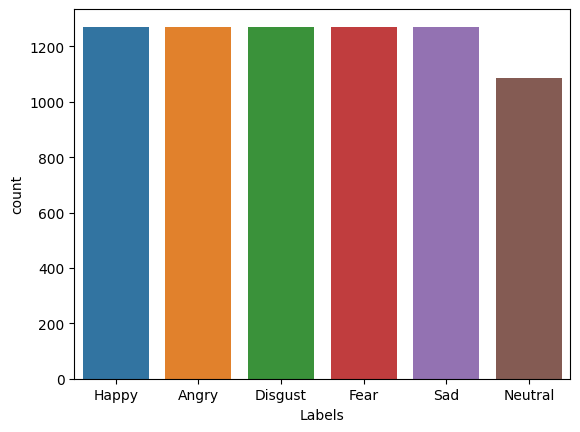

In [ ]:
sns.countplot(data=df, x="Labels")
plt.show()

**Interpretation: The distribution of labels in the target variable is approximately uniform. This suggests that each class or category within the target variable occurs with similar frequency in the dataset.**


###   **Load and display audio info**

In [ ]:
def wave(emotion):

    filename = np.array(df["Speech"][df["Labels"] == emotion])[10]
    data, sample_rate = librosa.load(filename)
    print("Sample_rate:", sample_rate, "; Quantization:", data)

    audio_widget = Audio(filename)                    # This line creates an IPython Audio widget that can be used to play the audio.
    display(audio_widget)                             # This line displays the audio widget in the notebook.

    #Time_Domain
    plt.figure(figsize = (8,3))
    plt.title(emotion)
    librosa.display.waveshow(data, sr = sample_rate)  # This line displays the audio waveform using librosa with the specified sample rate.

    #Spectogram
    plt.figure(figsize=(8,3))
    x = librosa.stft(data)                            # This computes the Short-Time Fourier Transform (STFT) of the audio data.
    xdb = librosa.amplitude_to_db(abs(x))             # This converts the amplitude of the STFT to decibels (dB).
    librosa.display.specshow(xdb, sr=sample_rate, x_axis='time', y_axis='hz')    # This displays the spectrogram.
    plt.colorbar()

    plt.show()

*   **Run sample signal of "Happy"**

Sample_rate: 22050 ; Quantization: [-2.5596663e-03 -3.2960651e-03 -3.0548959e-03 ...  2.9457436e-10
  7.6938311e-10  0.0000000e+00]


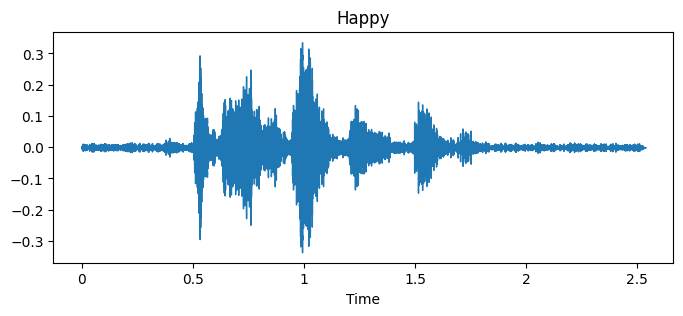

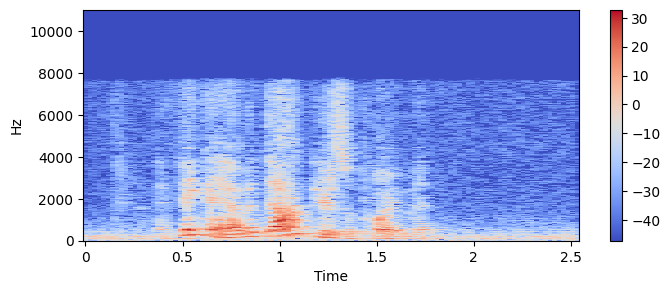

In [ ]:
wave("Happy")

*   **Run sample signal of "Angry"**

Sample_rate: 22050 ; Quantization: [-6.5575546e-04 -4.1600928e-04  2.1917933e-04 ... -1.4092493e-08
 -1.6666213e-10  0.0000000e+00]


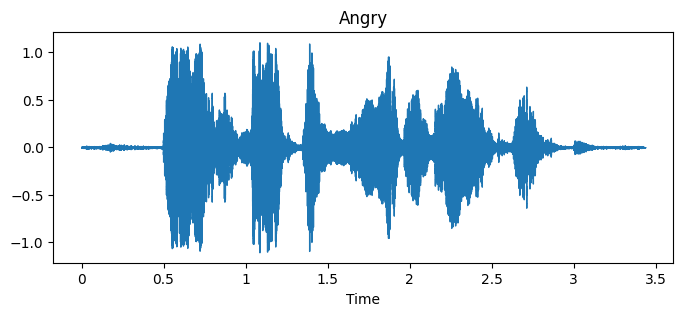

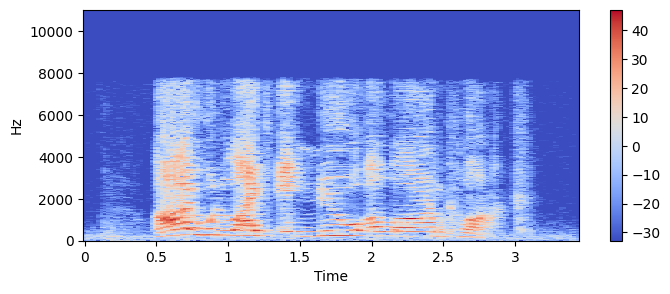

In [ ]:
wave("Angry")

*   **Run sample signal of "Disgust"**

Sample_rate: 22050 ; Quantization: [1.3424286e-03 1.6843777e-03 1.7642566e-03 ... 3.8849759e-09 5.2839222e-09
 0.0000000e+00]


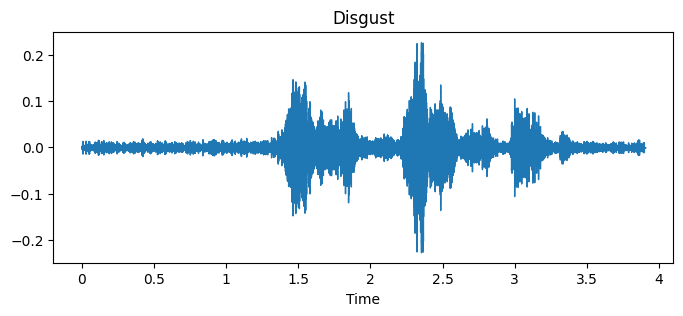

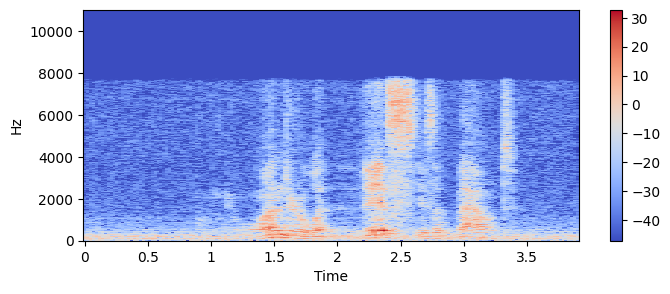

In [ ]:
wave("Disgust")

*   **Run sample signal of "Fear"**

Sample_rate: 22050 ; Quantization: [-0.00040988 -0.00064631 -0.0017117  ... -0.00026083 -0.00027664
  0.        ]


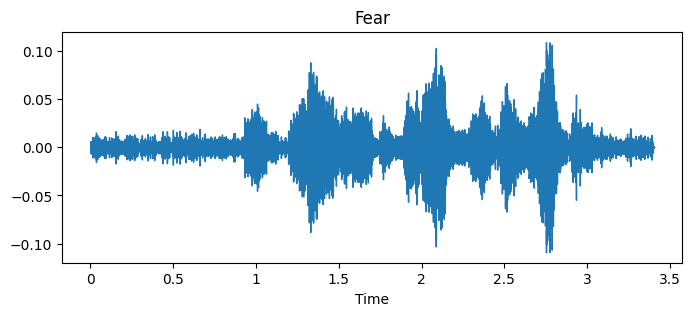

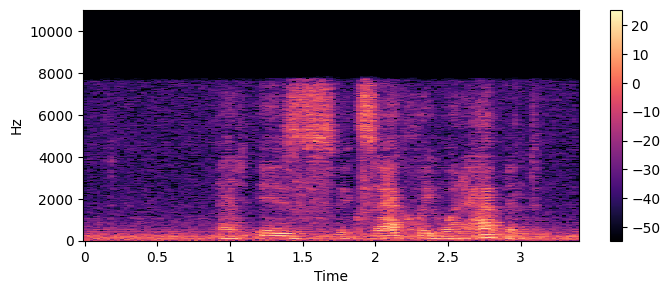

In [ ]:
wave("Fear")

*   **Run sample signal of "Sad"**

Sample_rate: 22050 ; Quantization: [-1.0094455e-03 -1.3827428e-03 -4.9513479e-04 ...  1.8487331e-10
  4.8024512e-10  0.0000000e+00]


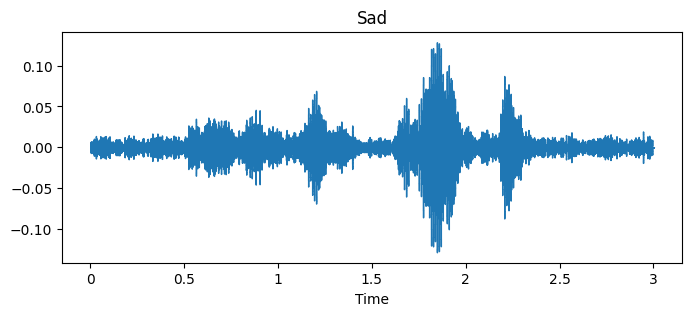

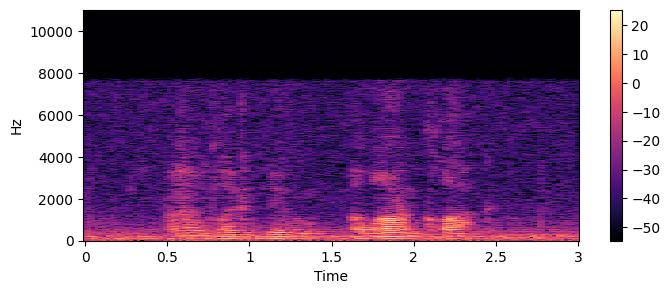

In [ ]:
wave("Sad")

*   **Run sample signal of "Neutral"**

Sample_rate: 22050 ; Quantization: [-7.697032e-03 -8.161470e-03 -7.151159e-03 ...  4.554523e-10 -7.910618e-11
 -2.435020e-10]


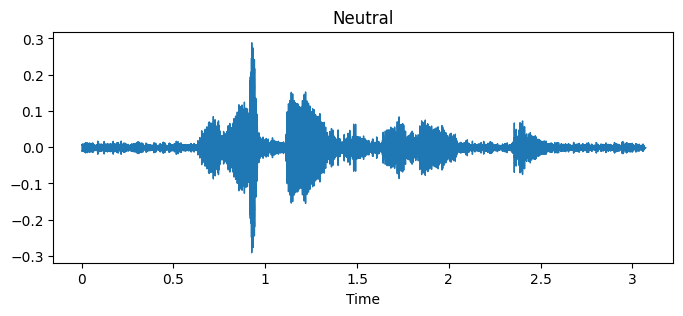

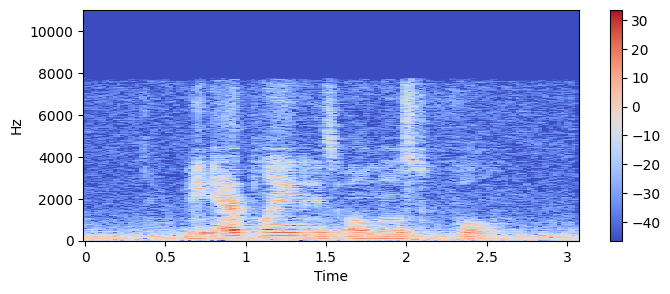

In [ ]:
wave("Neutral")

###  **Data Augmentation**
* **Data Augmentation is a technique used to artificially increase the diversity of a dataset by applying various transformations to the existing data. This can include operations like adding Noise, Shifting, Pitching, Streching, and more. By augmenting the data, we introduce variations that can help improve the robustness and generalization of machine / Deep learning  models**

In [ ]:
# The following function adds random noise to the input audio data
def noise(data, random=False, rate=0.035, threshold=0.075):
    if random:                                                         # If random is True, a random noise level between 0 and threshold is generated.
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# The following function applies a random shift to the input audio data.
def shift(data, rate=1000):
    shift_range = int(np.random.uniform(low=-5, high=5)*rate)          # Generates a random float between -5 and 5
    return np.roll(data, shift_range)                                  # If value is negative it will shift the data in rigth side, if positive it will shift data in left side.

# The following function changes the pitch of the input audio data.
def pitching(data, sample_rate, n_steps=0.7, random=False):          # A value of 0.7 for n_steps implies a relatively mild pitch shift. This means that the pitch of the audio will be altered by approximately 0.7 semitones.
    if random:
        n_steps = np.random.random() * n_steps
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=n_steps)

# The following changes the duration of the input audio data.
def stretch(data,rate=1.5):   # A rate greater than 1 will stretch the signal in time, while a rate less than 1 will compress it. In this case, a rate of 1.5 is used as a default.
                              # This means that the function is designed to stretch the signal in time by a factor of 1.5.
    new_length = int(len(data) * rate)
    stretched_data = resample(data, new_length)
    return stretched_data

***Note:  If you always used np.random.random() to generate the noise level, it would be completely random each time, potentially making it difficult to control or reproduce specific levels of noise. By using np.random.uniform(), you can specify a maximum threshold (threshold) for how random the noise level can be while still allowing for variability within that range.***



###   **Load the sample signal & check for noise, shift, pitch and strech**



In [ ]:
sample_data = '/content/drive/MyDrive/Speech Emotions Training Data/Crema/1079_WSI_HAP_XX.wav'
data, sample_rate = librosa.load(sample_data)

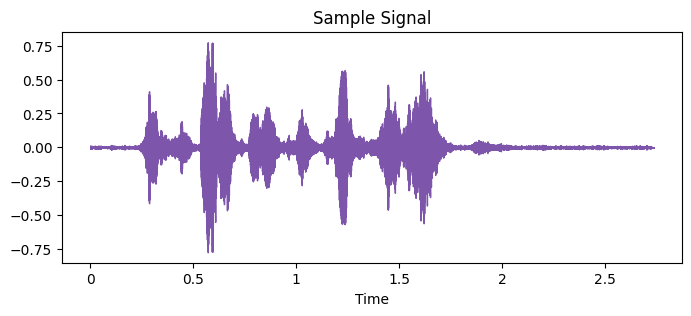

In [ ]:
plt.figure(figsize=(8,3))
librosa.display.waveshow(data, sr=sample_rate, color='#7D55AA')
audio_widget = Audio(sample_data)
plt.title("Sample Signal")
display(audio_widget)

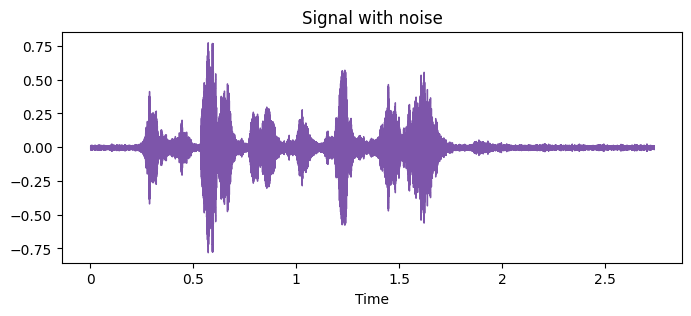

In [ ]:
noise_data = noise(data)
plt.figure(figsize=(8,3))
librosa.display.waveshow(noise_data, sr=sample_rate, color='#7D55AA')
audio_widget = Audio(noise_data, rate=sample_rate)
plt.title("Signal with noise")
display(audio_widget)

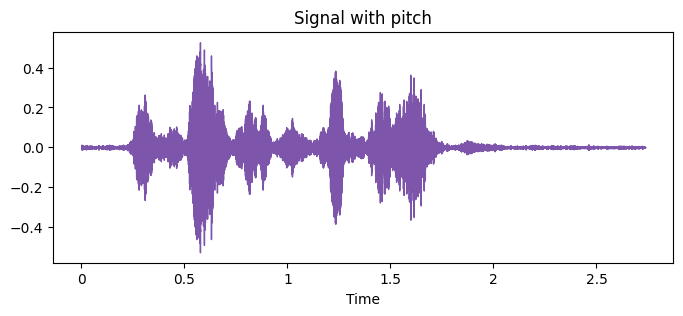

In [ ]:
pitch_data = pitching(data, sample_rate, random=True)
plt.figure(figsize=(8,3))
librosa.display.waveshow(y=pitch_data, sr=sample_rate, color='#7D55AA')
audio_widget = Audio(pitch_data, rate=sample_rate)
plt.title("Signal with pitch")
display(audio_widget)

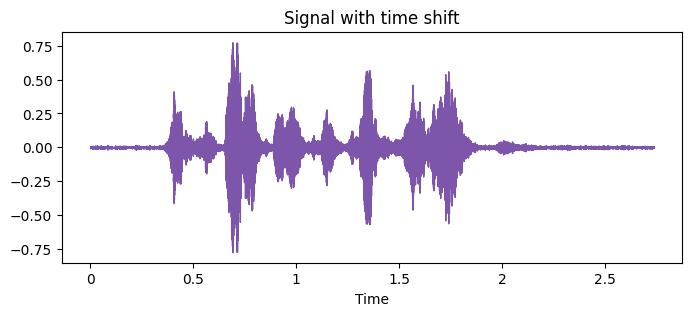

In [ ]:
shift_data = shift(data)
plt.figure(figsize=(8,3))
librosa.display.waveshow(shift_data, sr=sample_rate, color='#7D55AA')
audio_widget = Audio(shift_data, rate=sample_rate)
plt.title("Signal with time shift")
display(audio_widget)

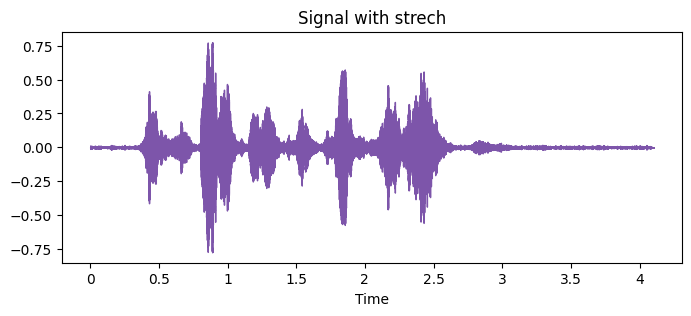

In [ ]:
strech_data=stretch(data)
plt.figure(figsize=(8,3))
librosa.display.waveshow(strech_data, sr=sample_rate, color='#7D55AA')
audio_widget = Audio(strech_data, rate=sample_rate)
plt.title("Signal with strech")
display(audio_widget)

* **Calculate frame and hop length of any sample signal**

In [ ]:
frame_length = librosa.time_to_samples(0.025, sr=sample_rate)
hop_length = librosa.time_to_samples(0.010, sr=sample_rate)
print("Frame length:", frame_length, "Hop length:", hop_length)

Frame length: 551 Hop length: 220



### **Feature Extraction**

In [ ]:
def zcr(data, frame_length=400, hop_length=200):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=400, hop_length=200):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sample_rate, frame_length=400, hop_length=200, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sample_rate)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

In [ ]:
def extract_features(data, sample_rate, frame_length=400, hop_length=200):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sample_rate, frame_length, hop_length)))
    return result

In [ ]:
def get_features(path, duration=2.8, offset=0.4):

    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

    # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data, random=True)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))

    # data with pitching
    pitched_data = pitching(data, sample_rate, random=True)
    res3 = extract_features(pitched_data, sample_rate)
    result = np.vstack((result, res3))

    # data with pitching and with_noise
    new_data = pitching(data, sample_rate, random=True)
    data_noise_pitch = noise(new_data, random=True)
    res3 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res3))

    return result

In [ ]:
X, y = [], []
print("Feature processing...")
for path, emotion, index in zip(df.Speech, df.Labels, range(df.Speech.shape[0])):
    features = get_features(path)
    if index % 500 == 0:
        print(f"{index} samples has been processed...")
    for i in features:
        X.append(i)
        y.append(emotion)
print("Done...")

Feature processing...
0 samples has been processed...
500 samples has been processed...
1000 samples has been processed...
1500 samples has been processed...
2000 samples has been processed...
2500 samples has been processed...
3000 samples has been processed...
3500 samples has been processed...
4000 samples has been processed...
4500 samples has been processed...
5000 samples has been processed...
5500 samples has been processed...
6000 samples has been processed...
6500 samples has been processed...
7000 samples has been processed...
Done...



*  **Creating a Dataframe and store extracted feature in excel**

In [ ]:
file_path = "/content/drive/MyDrive/Speech_emotion_training_data.csv"

In [ ]:
audio_df = pd.DataFrame(X)
audio_df["labels"] = y
audio_df.to_csv(features_path, index=False)

* **Read CSV file**

In [ ]:
audio_df = pd.read_csv("/content/drive/MyDrive/Speech_emotion_training_data.csv")
audio_df

,0,1,2,3,4,5,6,7,8,9,...,2973,2974,2975,2976,2977,2978,2979,2980,2981,labels
0,0.021779,0.043557,0.045372,0.065336,0.059891,0.038113,0.039927,0.030853,0.032668,0.027223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fear
1,0.041742,0.068966,0.081670,0.105263,0.116152,0.096189,0.072595,0.041742,0.036298,0.034483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fear
2,0.021779,0.050817,0.052632,0.061706,0.041742,0.027223,0.025408,0.023593,0.025408,0.023593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fear
3,0.023593,0.061706,0.078040,0.088929,0.081670,0.061706,0.045372,0.043557,0.032668,0.043557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fear
4,0.027223,0.050817,0.058076,0.047187,0.047187,0.036298,0.025408,0.025408,0.025408,0.030853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39163,0.098004,0.201452,0.212341,0.214156,0.201452,0.221416,0.268603,0.292196,0.261343,0.275862,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fear
39164,0.010889,0.014519,0.014519,0.012704,0.018149,0.023593,0.032668,0.034483,0.036298,0.025408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happy
39165,0.083485,0.112523,0.136116,0.117967,0.141561,0.197822,0.283122,0.263158,0.239564,0.199637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happy
39166,0.010889,0.014519,0.018149,0.016334,0.012704,0.018149,0.018149,0.023593,0.023593,0.027223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happy


**Interpretation: The dataset contains 39168  rows and 2983 columns. Each row represents a data sample, and each column represents a specific attribute or feature associated with each sample.**


*   **Fill null values with zeros**

In [ ]:
audio_df = audio_df.fillna(0)
print(audio_df.isna().any())
audio_df.shape

0         False
1         False
2         False
3         False
4         False
          ...  
2978      False
2979      False
2980      False
2981      False
labels    False
Length: 2983, dtype: bool


(39168, 2983)

In [ ]:
audio_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2973,2974,2975,2976,2977,2978,2979,2980,2981,labels
0,0.021779,0.043557,0.045372,0.065336,0.059891,0.038113,0.039927,0.030853,0.032668,0.027223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fear
1,0.041742,0.068966,0.081670,0.105263,0.116152,0.096189,0.072595,0.041742,0.036298,0.034483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fear
2,0.021779,0.050817,0.052632,0.061706,0.041742,0.027223,0.025408,0.023593,0.025408,0.023593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fear
3,0.023593,0.061706,0.078040,0.088929,0.081670,0.061706,0.045372,0.043557,0.032668,0.043557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fear
4,0.027223,0.050817,0.058076,0.047187,0.047187,0.036298,0.025408,0.025408,0.025408,0.030853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fear


In [ ]:
audio_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981
count,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000,...,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000,39168.000000
mean,0.057264,0.101917,0.111634,0.110523,0.110175,0.110798,0.111358,0.111323,0.110819,0.110254,...,-0.099868,-0.157866,-0.063260,-0.409776,-0.096724,-0.476859,-0.128164,-0.373628,-0.145690,-0.261844
std,0.061543,0.107485,0.117348,0.116325,0.116291,0.116209,0.115821,0.115205,0.114855,0.114362,...,1.557451,1.498662,1.418479,2.074154,1.495012,2.256102,1.404315,1.894737,1.395670,1.583257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.462360,-24.696430,-17.475361,-28.780684,-28.595696,-34.734352,-25.618291,-29.762733,-20.592398,-29.390219
25%,0.018149,0.034483,0.038113,0.038113,0.038113,0.038113,0.038113,0.039927,0.039927,0.039927,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.030853,0.054446,0.059891,0.059891,0.059891,0.059891,0.061706,0.061706,0.061706,0.061706,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.067151,0.121597,0.132486,0.128857,0.128857,0.128857,0.132486,0.132486,0.130672,0.127042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.415608,0.729583,0.807623,0.822142,0.809437,0.827586,0.814882,0.805808,0.771325,0.602541,...,19.780780,21.706911,22.855755,17.247778,21.913754,14.368974,17.006683,14.822210,23.746647,17.940936


### **Data Preparation**

*   **Split data into X and y. X contain independent data and y contain dependent data.**

In [ ]:
X = audio_df.drop("labels", axis=1)
y = audio_df["labels"]

*  **Import Dependancies for model preparation**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import backend as K
from keras import layers, models, regularizers
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.models import load_model
import joblib

*  **One Hot Encoding**

In [ ]:
enc = OneHotEncoder()
y = enc.fit_transform(audio_df["labels"].values.reshape(-1,1))

In [ ]:
y.shape

(39168, 6)

In [ ]:
y.toarray()

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [ ]:
y.shape

(39168, 6)

*   **Split the data for training, testing and validation**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31334, 2982), (7834, 2982), (31334, 6), (7834, 6))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((28200, 2982), (7834, 2982), (3134, 2982), (28200, 6), (7834, 6), (3134, 6))

### **Scalling independent variables**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((28200, 2982), (7834, 2982), (3134, 2982), (28200, 6), (7834, 6), (3134, 6))

In [ ]:
print("Is scaler fitted?", scaler.n_features_in_)

Is scaler fitted? 2982


* **Converting into shape that compatible with CNN**

In [ ]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((28200, 2982, 1), (7834, 2982, 1), (3134, 2982, 1))

In [ ]:
y_train = y_train.toarray()
y_test = y_test.toarray()
y_val = y_val.toarray()

In [ ]:
joblib.dump(scaler,'/content/drive/MyDrive/scaler_file.pkl')

['/content/drive/MyDrive/scaler_file.pkl']

### **Model Preparation**

1.   **Early stopping: To prevent model from overfitting**
2.   **Learning Rate: To achive global minima**

In [ ]:
earlystopping = EarlyStopping(monitor ="val_acc",
                              mode = 'auto', patience = 4,
                              restore_best_weights = True)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

**Calculate Accuracy**

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

**CNN Architecture**

In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(X_train.shape[1],1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(6, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc", f1_m])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2982, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2982, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1491, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1491, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1491, 512)         2048      
 chNormalization)                                                
                                                        

In [ ]:
history=model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val),
                  batch_size=64,callbacks=[earlystopping,learning_rate_reduction])

Epoch 1/50
441/441 [==============================] - 202s 412ms/step - loss: 1.3454 - acc: 0.4777 - f1_m: 0.4111 - val_loss: 1.4414 - val_acc: 0.4167 - val_f1_m: 0.2277 - lr: 0.0010
Epoch 2/50
441/441 [==============================] - 176s 400ms/step - loss: 1.0925 - acc: 0.5635 - f1_m: 0.5076 - val_loss: 1.1066 - val_acc: 0.5498 - val_f1_m: 0.5077 - lr: 0.0010
Epoch 3/50
441/441 [==============================] - 176s 398ms/step - loss: 0.9976 - acc: 0.6023 - f1_m: 0.5621 - val_loss: 1.0527 - val_acc: 0.5852 - val_f1_m: 0.5254 - lr: 0.0010
Epoch 4/50
441/441 [==============================] - 175s 398ms/step - loss: 0.9457 - acc: 0.6295 - f1_m: 0.5898 - val_loss: 1.3897 - val_acc: 0.4815 - val_f1_m: 0.4602 - lr: 0.0010
Epoch 5/50
441/441 [==============================] - 176s 398ms/step - loss: 0.8768 - acc: 0.6586 - f1_m: 0.6281 - val_loss: 1.2610 - val_acc: 0.6343 - val_f1_m: 0.6067 - lr: 0.0010
Epoch 6/50
441/441 [==============================] - 175s 397ms/step - loss: 0.8365 

**Interpretation: The model is able to correctly predict the labels of the training data with very high accuracy(about 99%). The validation accuracy is slightly lower than the training accuracy. This is expected and common. It suggests that the model is performing very well on the data it has seen during training.**
*   **Store the weights**

In [ ]:
model.save('/content/drive/MyDrive/Speech_emotion_recognition_model.h5')

*   **Plot the graph between training and validation accuracy**

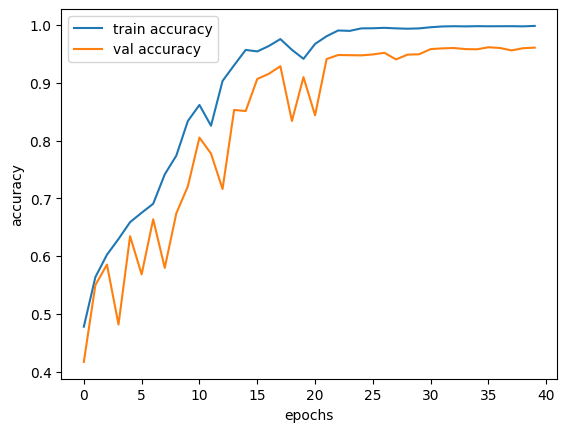

In [ ]:
epochs = list(range(40))
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

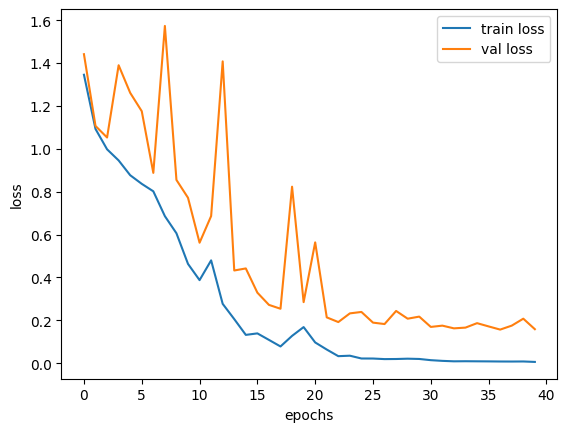

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



*  **Model Prediction**



In [ ]:
y_pred = model.predict(X_test)

245/245 [==============================] - 16s 61ms/step


In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

* **Plot confusion matrix**

In [ ]:
cm = confusion_matrix(y_true_labels, y_pred_labels)

In [ ]:
print(len(y_true_labels), len(y_pred_labels))

7834 7834


In [ ]:
class_labels = ['Fear', 'Sad', 'Angry', 'Disgust', 'Happy', 'Neutral']

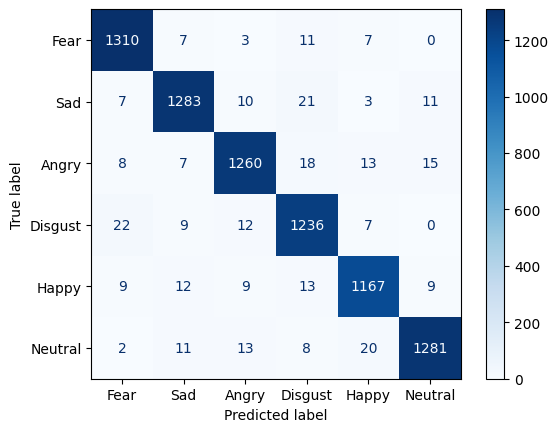

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("The testing accuracy of model is: ", accuracy)

The testing accuracy of model is:  0.9620883329078377


In [ ]:
from keras.models import load_model
from keras import backend as K
import tensorflow as tf

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

with tf.compat.v1.keras.utils.custom_object_scope({'f1_m': f1_m}):
    SER_model = load_model('Speech_emotion_recognition_model.h5')

**Conclusion:**


1. The model has demonstrated excellent performance on the training data, achieving an accuracy of 99%. This suggests that the model has successfully learned the patterns and features in the training dataset.
2. The model maintains a high accuracy of 96% on the validation dataset. This is a positive sign as it indicates that the model generalizes well to unseen data. It performs reliably across different emotions, which is crucial for speech emotion recognition.
3. The confusion matrix shows that the model makes relatively few errors across various emotions. This is a promising outcome, as it indicates that the model can distinguish between different emotions with a high degree of accuracy.




* **Test the Sample Data**

In [ ]:
test_sample = pd.read_csv()

* **Feature Extraction from sample data**

In [ ]:
def get_features1(path, duration=2.8, offset=0.4):

    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

    # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

  return result

In [ ]:
sample_features = get_feature_1(test_sample)

In [ ]:
test_df = pd.DataFrame(sample_features)

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/Speech_emotion_sample_data.csv")

In [ ]:
test_df = test_df.fillna(0)
print(test_df.isna().any())

0    False
dtype: bool


* **Sample Preparation for prediction**

In [ ]:
X1 = test_df

In [ ]:
X1.shape

(1776, 1)

In [ ]:
X2 = X1.values

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
n_cols_train = X_train.shape[1]
X1_test_padded = pad_sequences(X2, maxlen=n_cols_train, padding='post')

In [ ]:
X1_test = scaler.transform(X1_test_padded)

In [ ]:
X1_test=np.expand_dims(X1_test,axis=2)

In [ ]:
X1_test.shape

(1, 2982, 1)

* **Prediction on Sample**

In [ ]:
prediction = model.predict(X1_test)

1/1 [==============================] - 0s 209ms/step


In [ ]:
emotion_mapping = {0: 'Fear', 1: 'Sad', 2: 'Angry', 3: 'Disgust', 4: 'Happy', 5: 'Neutral'}
predicted_emotion = emotion_mapping[np.argmax(prediction)]
print("The person is ", predicted_emotion)

The person is  Neutral
